In [8]:
import pandas as pd
import matplotlib.pyplot as plt

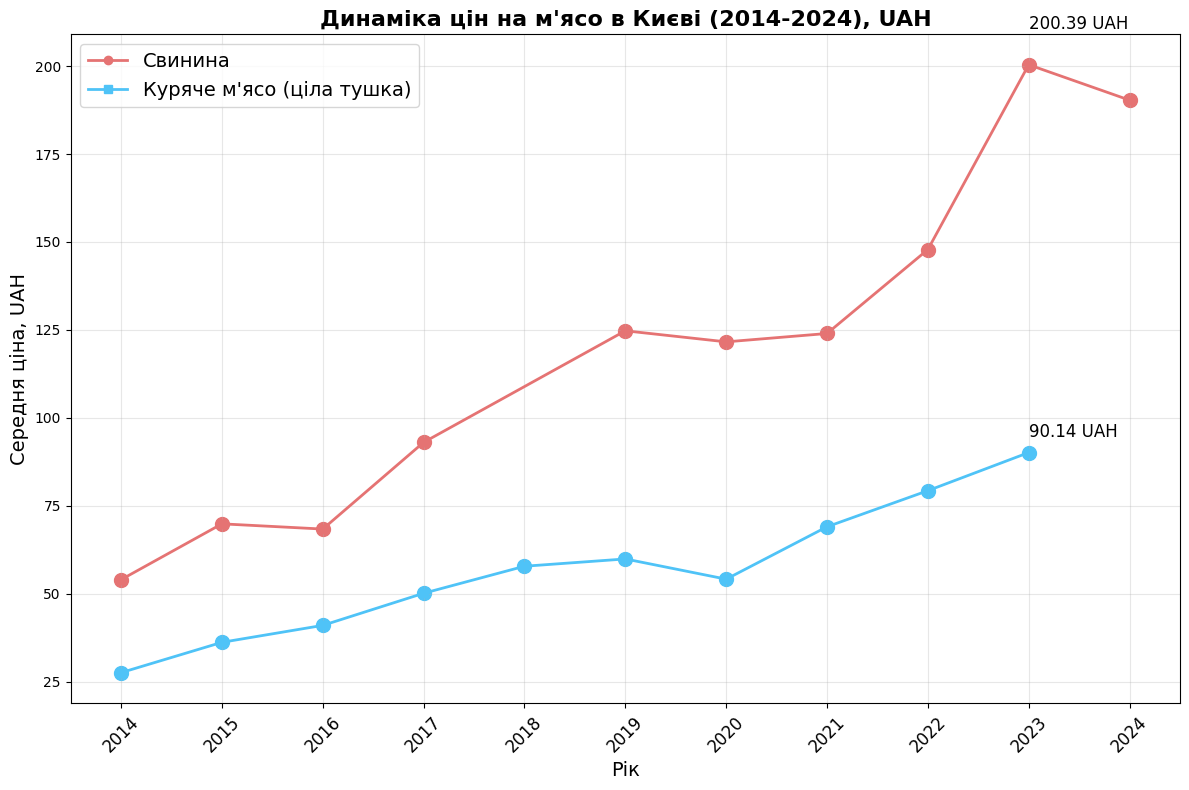

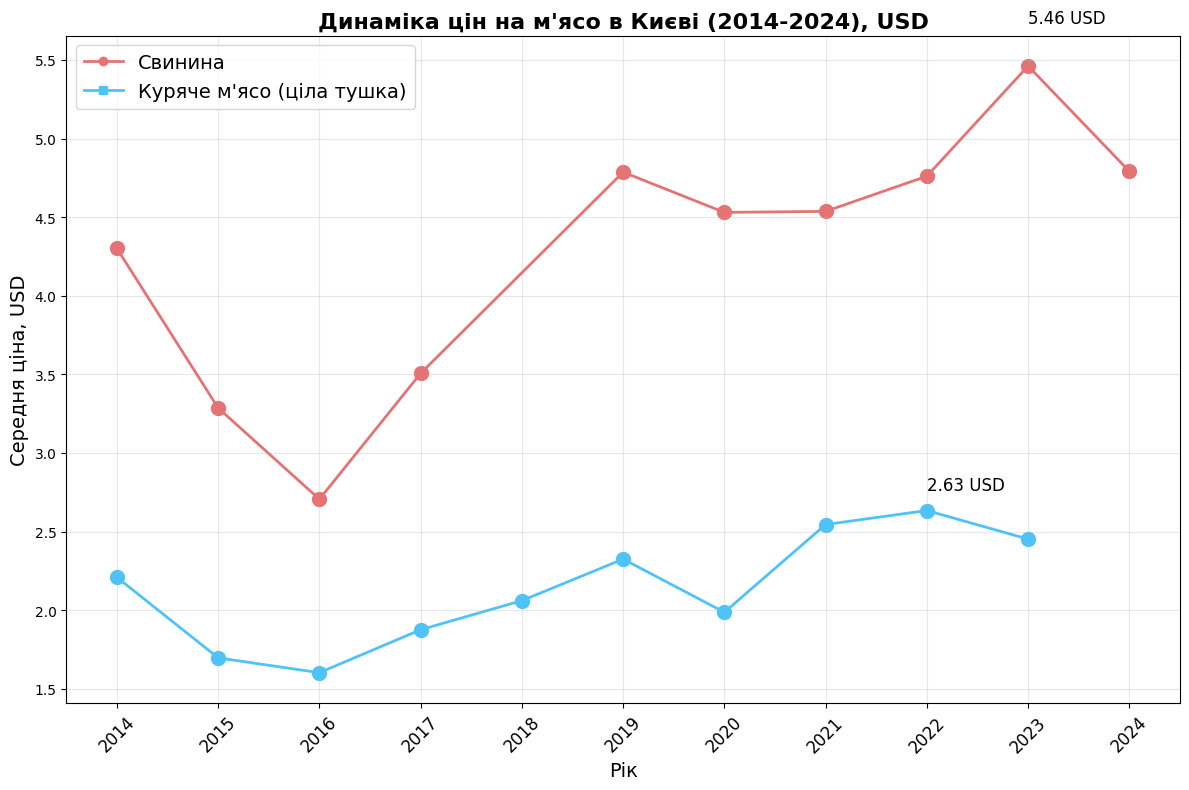

In [9]:
def load_and_prepare_data(file_path):
    # Зчитування CSV файлу
    df = pd.read_csv(file_path, low_memory=False)

    # Фільтрація даних для Києва
    kyiv_meat_data = df[(df['admin1'] == 'Kyivska') &
                        (df['market'].isin(['Kyiv', 'Kyiv city'])) &
                        (df['commodity'].isin(['Meat (pork)', 'Meat (chicken, whole)']))].copy()

    # Перетворення дати
    kyiv_meat_data['date'] = pd.to_datetime(kyiv_meat_data['date'])
    kyiv_meat_data['year'] = kyiv_meat_data['date'].dt.year

    # Перетворення цін у числові значення
    kyiv_meat_data['price'] = pd.to_numeric(kyiv_meat_data['price'], errors='coerce')
    kyiv_meat_data['usdprice'] = pd.to_numeric(kyiv_meat_data['usdprice'], errors='coerce')

    return kyiv_meat_data


def analyze_prices(data):
    # Групування за роком та типом м'яса
    yearly_prices = data.groupby(['year', 'commodity']).agg({
        'price': 'mean',
        'usdprice': 'mean'
    }).reset_index()

    return yearly_prices

def visualize_prices(yearly_prices, currency='UAH'):
    plt.figure(figsize=(12, 8))

    # Вибір колонки з даними в залежності від валюти
    price_column = 'price' if currency == 'UAH' else 'usdprice'

    # Фільтрація даних для кожного типу м'яса
    pork_data = yearly_prices[yearly_prices['commodity'] == 'Meat (pork)']
    chicken_data = yearly_prices[yearly_prices['commodity'] == 'Meat (chicken, whole)']

    # Побудова графіка
    plt.plot(pork_data['year'], pork_data[price_column], marker='o', linewidth=2,
             label='Свинина', color='#E57373')
    plt.plot(chicken_data['year'], chicken_data[price_column], marker='s', linewidth=2,
             label='Куряче м\'ясо (ціла тушка)', color='#4FC3F7')

    # Додавання точок на графік
    plt.scatter(pork_data['year'], pork_data[price_column], s=100, color='#E57373')
    plt.scatter(chicken_data['year'], chicken_data[price_column], s=100, color='#4FC3F7')

    # Додавання інформації про максимальні ціни на графік
    max_pork_price = pork_data[price_column].max()
    max_pork_year = pork_data.loc[pork_data[price_column].idxmax(), 'year']
    max_chicken_price = chicken_data[price_column].max()
    max_chicken_year = chicken_data.loc[chicken_data[price_column].idxmax(), 'year']

    # Додавання анотацій до максимальних значень
    plt.annotate(f'{max_pork_price:.2f} {currency}',
                 xy=(max_pork_year, max_pork_price),
                 xytext=(max_pork_year, max_pork_price * 1.05),
                 fontsize=12)

    plt.annotate(f'{max_chicken_price:.2f} {currency}',
                 xy=(max_chicken_year, max_chicken_price),
                 xytext=(max_chicken_year, max_chicken_price * 1.05),
                 fontsize=12)

    plt.title(f'Динаміка цін на м\'ясо в Києві (2014-2024), {currency}', fontsize=16, fontweight='bold')
    plt.xlabel('Рік', fontsize=14)
    plt.ylabel(f'Середня ціна, {currency}', fontsize=14)

    plt.xticks(sorted(set(yearly_prices['year'])), fontsize=12, rotation=45)

    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=14)

    plt.tight_layout()

    return plt

def main():
    file_path = 'wfp_food_prices_ukr.csv'

    kyiv_meat_data = load_and_prepare_data(file_path)

    yearly_prices  = analyze_prices(kyiv_meat_data)

    # Візуалізація в гривнях та доларах США
    plt_uah = visualize_prices(yearly_prices, currency='UAH')
    plt_usd = visualize_prices(yearly_prices, currency='USD')
    plt.show()

if __name__ == "__main__":
    main()